# QRS detection with MatLab script of Hooman Sedghamiz

In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import sys
from oct2py import octave

Downloading an ECG from mimic III

In [2]:
folder = "p05/p050140"
waveform = "p050140-2188-07-26-05-51"
sig, fields = wfdb.srdsamp(waveform,pbdir='mimic3wdb/matched/'+folder)

In [3]:
print("signame: " + str(fields['signame']))
print("units: " + str(fields['units']))
print("fs: " + str(fields['fs']))
print("comments: " + str(fields['comments']))
print("fields: " + str(fields))

signame: ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH']
units: ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU']
fs: 125
comments: ['Location: micu']
fields: {'signame': ['aVR', 'II', 'I', 'III', 'ABP', 'CVP', 'PLETH'], 'comments': ['Location: micu'], 'units': ['mV', 'mV', 'mV', 'mV', 'mmHg', 'mmHg', 'NU'], 'fs': 125}


Lets check if the signal contains the signal II

In [4]:
signalII = None
try:
    signalII = fields['signame'].index("II")
except ValueError:
    print("List does not contain value")
if(signalII!=None):
    print("List contain value ",signalII)

List contain value  1


Obtain only the signal II from the ECG

In [5]:
array = sig[:, signalII]
array = np.nan_to_num(array)

Save the Frame Secuence

In [6]:
fs = fields['fs']
fs

125

SubArray 400000

In [7]:
window = 100000
sampfrom = 0
sampto = window
subArray = array[sampfrom:sampto]
print(len(subArray))
print(subArray)

100000
[ 0.          0.          0.         ...,  0.45669291  0.          0.46456693]


In [8]:
octave.addpath('/home/scidb/HeartRatePatterns/Matlab/')
octave.eval('pkg load signal')

In [9]:
%load_ext oct2py.ipython

In [10]:
%%octave -i subArray,fs -o R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot
[R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot] = peakdetect(subArray,fs,false); 

In [11]:
Ri = R_i
Ramp = R_amp
Si = S_i
Samp = S_amp
Ti = T_i
Tamp = T_amp
Qi = Q_i
Qamp = Q_amp

In [12]:
sampfrom += window+1
sampto += window
subArray = array[sampfrom:sampto]

In [13]:
%%octave -i subArray,fs -o R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot
[R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot] = peakdetect(subArray,fs,false); 

In [14]:
print("R_i",R_i)
print("Ri",Ri)
print("S_i",S_i)
print("R_i",T_i)
print("Q_i",Q_i)
print(heart_rate)
print(buffer_plot)

R_i [[    6  6075 13056 13225 13379 13507 17934 22778 27435 28321 30818 32968
  35755 37923 43269 44622 46610 47850 50096 52297 57450 58840 62361 62707
  64675 69542 72768 82832 83574 87979 95117 96789 98113]]
Ri [[ 3350  3609  3727  3833  4044  4255  4532  4947  5148  5576  5787  5929
   6139  6345  6560  6757  7329  7816  8452  8589  9079  9285  9640 10057
  10541 10749 10959 11171 11386 11599 11811 12088 12295 12910 13059 13271
  13486 13762 14075 14256 14401 14612 14817 15088 15177 15384 15524 16296
  16504 16713 17199 17480 17619 17921 18174 18374 18923 20983 21550 21900
  22800 23157 23362 24343 24837 25042 25247 25452 25655 25861 26063 26261
  26402 26674 27006 27152 27356 27701 28253 28526 28787 29464 29808 29992
  30189 30594 30793 31699 31895 32222 33145 34074 35028 35133 35239 35387
  35461 35842 36889 37108 37925 38252 38652 39115 39444 39903 40035 40154
  40370 40566 40718 40820 40892 40967 41297 41395 41586 42267 42399 42583
  42714 43275 43399 43522 43595 43663 43782 439

In [15]:
To= 5
subarray = buffer_plot[0][Q_i[0][0]:T_i[0][To]]
print(len(subarray))
subQ_i = Q_i[0][:To]
subQ_amp = Q_amp[0][:To]
subR_i = R_i[0][:To]
subR_amp = R_amp[0][:To]
subS_i = S_i[0][:To]
subS_amp = S_amp[0][:To]
subT_i = T_i[0][:To]
subT_amp = T_amp[0][:To]

22740


In [16]:
fig_size = [12,9]
plt.rcParams["figure.figsize"] = fig_size

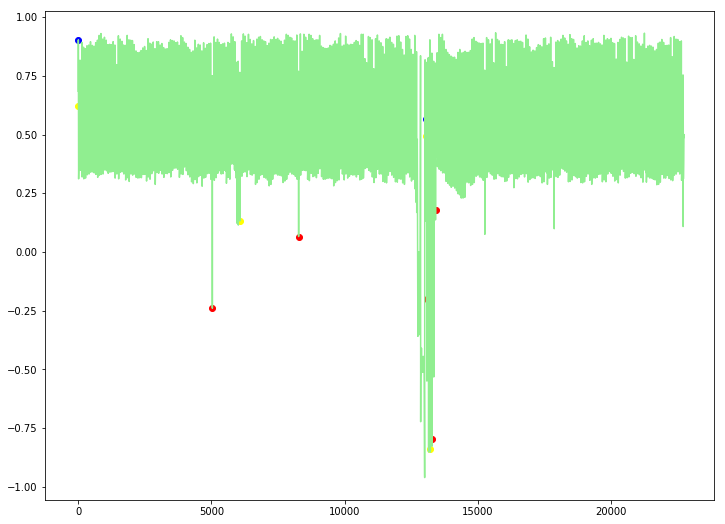

In [17]:
plt.plot(np.arange(Q_i[0][0],T_i[0][To]),np.array(subarray),c='lightgreen')
plt.scatter(subQ_i, subQ_amp,c='yellow')
plt.scatter(subR_i, subR_amp,c='blue')
plt.scatter(subS_i, subS_amp,c='red')
plt.scatter(subT_i, subT_amp,c='black')
plt.show()

In [18]:
size = 65
sq = S_i[0][:size]-Q_i[0][:size]
sq

array([5035, 2205,   40,   64,   39, 1765, 4779, 3221,  278, 1739, 2021,
       1289, 2038, 2547,  475,  613,  349,  282,  357, 3292,  835,  432,
        149, 1492, 4262, 3139, 8843,  548, 3464, 5499,  768,  844,  844])

In [19]:
tq = T_i[0][:size]-Q_i[0][:size]
tq

ValueError: operands could not be broadcast together with shapes (31,) (33,) 

In [ ]:
ts = T_i[0][:size]-S_i[0][:size]
ts

In [ ]:
heartRate = np.stack((sq, tq,ts), axis=-1)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = np.array(heartRate)
est = KMeans(n_clusters=10).fit(X)

In [ ]:
print(est.labels_)
print(est.cluster_centers_)

In [ ]:
import collections

In [ ]:
labels, values = zip(*collections.Counter(est.labels_).items())
#labels, values = zip(*collections.Counter(patient).most_common(14))
indexes = np.arange(len(labels))
width = 0.5
fig_size = [12,9]
fig, ax = plt.subplots() 
for i, v in enumerate(values):
    ax.text(i-0.1,v+1, str(v), color='blue', fontweight='bold')
    
plt.rcParams["figure.figsize"] = fig_size
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.01, labels)
plt.show()

In [ ]:
sampfrom = max(max(R_i[0]),max(S_i[0]),max(T_i[0]),max(Q_i[0]))
sampfrom

In [ ]:
sampfrom = 400000
sampto = 400000+sampfrom
folder = "p05/p050140"
waveform = "p050140-2188-07-26-05-51"
sig, fields = wfdb.srdsamp(waveform,pbdir='mimic3wdb/matched/'+folder,
                           sampfrom=sampfrom, sampto=sampto)

In [ ]:
array = np.nan_to_num(sig[:, signalII])
array = array
array

In [ ]:
%%octave -i array -o R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot
[R_i,R_amp,S_i,S_amp,T_i,T_amp,Q_i,Q_amp,heart_rate,buffer_plot] = peakdetect(array,125,false); 

In [ ]:
print(fs)
print("R_i",R_i)
print("S_i",S_i)
print("R_i",T_i)
print("Q_i",Q_i)
print(heart_rate)
print(buffer_plot)